# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [173]:
#maulana sandy

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [175]:
dataframe = pd.read_csv('Customers.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#***1. Memahami Struktur Data***

In [176]:
print("Dataset Info:")
print(dataframe.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [177]:
print("Initial Rows:")
print(dataframe.head())

Initial Rows:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [178]:
dataframe.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


#***2. Menangani Data yang Hilang***

In [179]:
# Handling Missing Values
dataframe.dropna(inplace=True)

#***3 dan 4 Analisis Distribusi dan Korelasi dan Visualisasi Data***

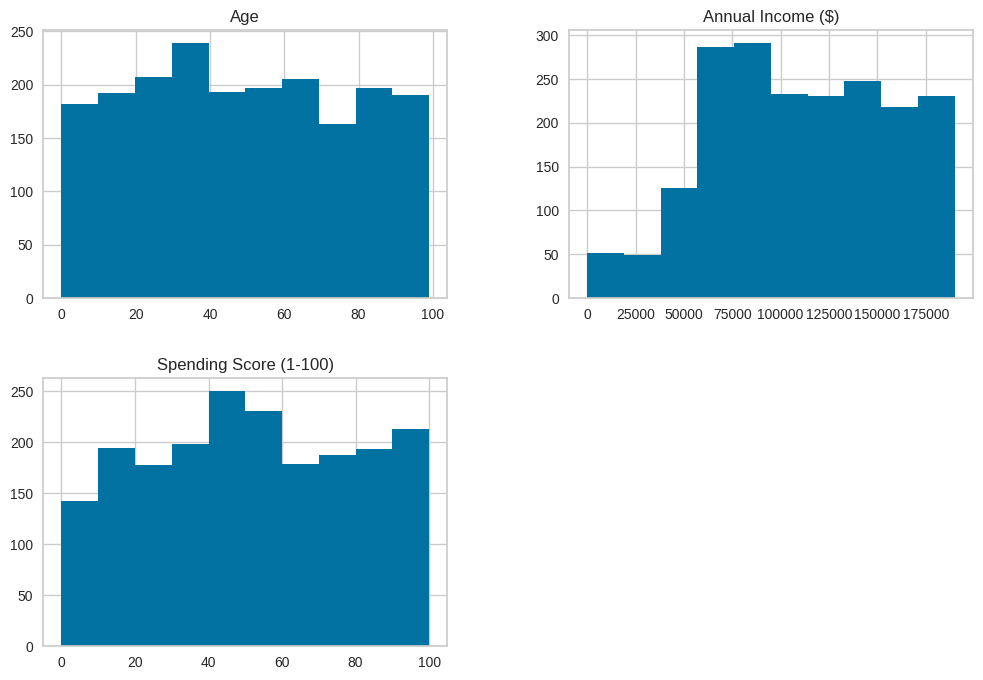

In [180]:
def plot_distribution(data, features):
    data[features].hist(figsize=(12, 8))
    plt.show()

plot_distribution(dataframe, ['Age', 'Annual Income ($)', 'Spending Score (1-100)'])

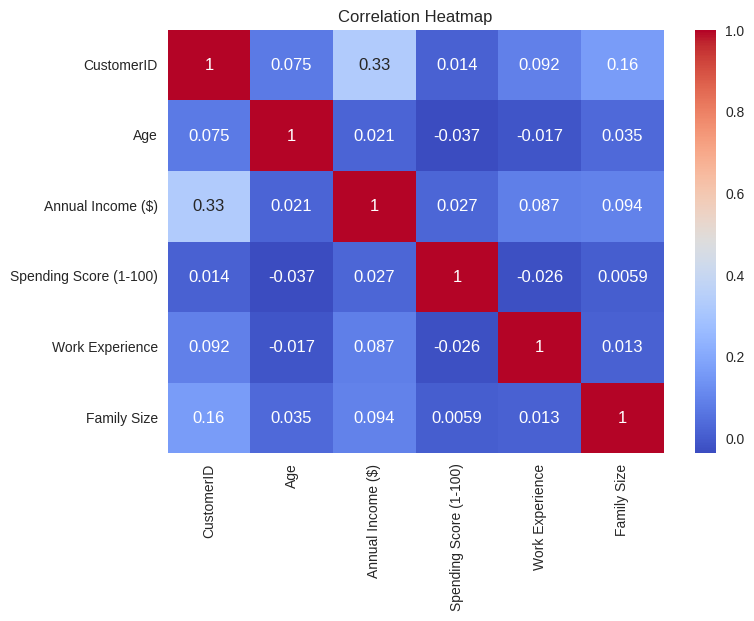

In [181]:
sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [182]:
encoder = LabelEncoder()
dataframe['Gender'] = encoder.fit_transform(dataframe['Gender'])
dataframe['Profession'] = encoder.fit_transform(dataframe['Profession'])

In [183]:
scaling_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
dataframe[scaling_columns] = scaler.fit_transform(dataframe[scaling_columns])
dataframe.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,-1.052345,-2.086675,-0.431850,5,1,4
1,2,1,-0.981941,-1.650205,1.069755,2,3,3
2,3,0,-1.017143,-0.537207,-1.611684,2,1,1
3,4,0,-0.911538,-1.126441,0.926745,7,0,2
4,5,0,-0.629924,-1.584734,-0.396098,3,2,6


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [184]:
def train_kmeans(data, clusters=3):
    model = KMeans(n_clusters=clusters, random_state=42)
    model.fit(data)
    return model

cluster_model = train_kmeans(dataframe, clusters=4)
dataframe['ClusterGroup'] = cluster_model.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [185]:
sil_score = silhouette_score(dataframe, cluster_model.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5706575656384386


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

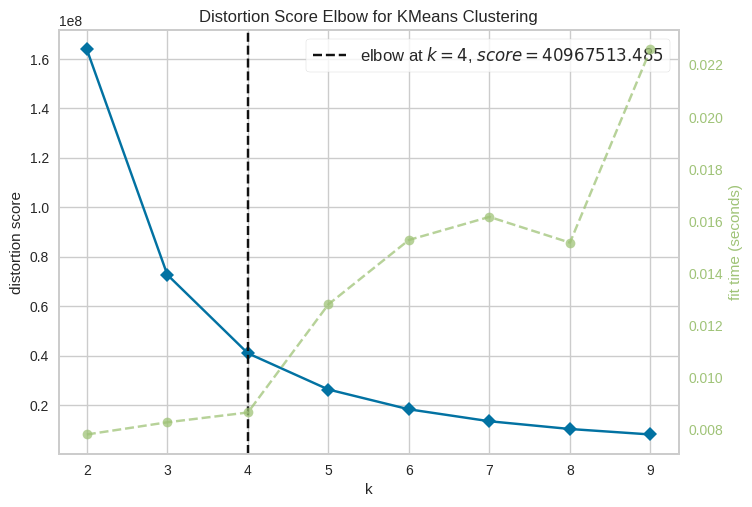

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:
elbow_visual = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visual.fit(dataframe)
elbow_visual.show()

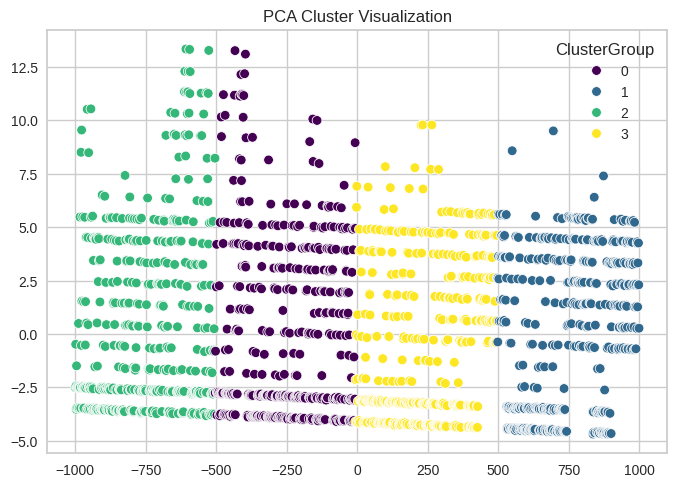

In [187]:
pca_transform = PCA(n_components=2)
pca_data = pca_transform.fit_transform(dataframe)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dataframe['ClusterGroup'], palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [188]:
for cluster_label in dataframe['ClusterGroup'].unique():
    cluster_data = dataframe[dataframe['ClusterGroup'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())  # Statistik deskriptif
    # Analisis lebih lanjut dapat dilakukan pada kolom spesifik, misal:
    print(f"Rata-rata annual income di cluster {cluster_label}: {cluster_data['Annual Income ($)'].mean()}")


Karakteristik Cluster 2:
       CustomerID      Gender         Age  Annual Income ($)  \
count  490.000000  490.000000  490.000000         490.000000   
mean   248.408163    0.416327   -0.136811          -0.663206   
std    143.357094    0.493453    0.874332           1.060214   
min      1.000000    0.000000   -1.721179          -2.414027   
25%    125.250000    0.000000   -0.805933          -1.448338   
50%    249.500000    0.000000   -0.313108          -0.799089   
75%    371.750000    1.000000    0.531735          -0.086421   
max    496.000000    1.000000    1.763797           1.704479   

       Spending Score (1-100)  Profession  Work Experience  Family Size  \
count              490.000000  490.000000       490.000000   490.000000   
mean                 0.005498    2.773469         4.112245     3.046939   
std                  1.002599    2.591419         4.266392     1.678640   
min                 -1.826199    0.000000         0.000000     1.000000   
25%                 -0

**Cluster 0: Keluarga Hemat**

Karakteristik:

1. Pendapatan: Rata-rata pendapatan positif (0.211), lebih tinggi dari Cluster 2 tetapi masih lebih rendah dari Cluster 1.
2. Usia: Rata-rata usia mendekati nol (-0.014), artinya kelompok ini terdiri dari gabungan individu muda dan dewasa tanpa dominasi usia tertentu.
3. Kebiasaan Belanja: Sedikit negatif (-0.050), mencerminkan gaya belanja hemat atau konservatif.
4. Ukuran Keluarga: Rata-rata 3.92 anggota, menunjukkan keluarga besar.
5. Pengalaman Kerja: Rata-rata pengalaman kerja hanya 3.83 tahun, menunjukkan mayoritas pekerja baru atau dengan pengalaman terbatas.
6. Strategi: Kelompok ini ideal untuk produk rumah tangga yang hemat atau layanan keluarga seperti paket diskon. Mereka cenderung merespons baik terhadap promosi harga rendah.

**Cluster 1: Konsumen Premium**

Karakteristik:

1. Pendapatan: Tertinggi di antara semua cluster (0.244), mencerminkan daya beli yang kuat.
2. Usia: Rata-rata sedikit positif (0.027), menunjukkan dominasi dewasa muda.
3. Kebiasaan Belanja: Hampir nol (0.012), artinya mereka memiliki kebiasaan belanja yang seimbang, tidak terlalu boros atau hemat.
4. Ukuran Keluarga: Rata-rata 3.94 anggota, sedikit lebih besar dari rata-rata dataset.
5. Pengalaman Kerja: Tertinggi di semua cluster (4.67 tahun), mencerminkan kelompok ini memiliki profesional yang lebih matang.
6. Strategi: Kelompok ini cocok untuk pemasaran produk atau layanan premium seperti kendaraan, barang elektronik, atau program loyalitas pelanggan. Daya beli mereka memungkinkan fokus pada produk berkualitas tinggi.

**Cluster 2: Konsumen Berdaya Beli Rendah**

Karakteristik:

1. Pendapatan: Terendah (-0.663), jauh di bawah rata-rata dataset.
2. Usia: Negatif (-0.137), menunjukkan mayoritas terdiri dari individu muda.
3. Kebiasaan Belanja: Hampir nol (0.005), mencerminkan gaya belanja yang sangat konservatif atau hemat.
4. Ukuran Keluarga: Rata-rata 3.05 anggota, lebih kecil dari kelompok lain.
5. Pengalaman Kerja: Rendah (4.11 tahun), mencerminkan sebagian besar adalah pekerja baru.
6. Strategi: Fokus pada produk terjangkau atau promosi diskon besar. Layanan berbasis edukasi atau komunitas juga dapat menarik perhatian mereka karena daya beli mereka rendah.

**Cluster 3: Keluarga Besar dengan Stabilitas Pengeluaran**

Karakteristik:

1. Pendapatan: Positif (0.205), hampir sama dengan Cluster 0, menunjukkan penghasilan stabil.
2. Usia: Rata-rata sedikit positif (0.123), mencerminkan kelompok ini sebagian besar terdiri dari individu dewasa.
3. Kebiasaan Belanja: Positif kecil (0.032), menunjukkan kebiasaan belanja yang sedikit lebih aktif dibanding cluster lainnya.
4. Ukuran Keluarga: Tertinggi di antara semua cluster (4.12 anggota), menunjukkan keluarga besar.
5. Pengalaman Kerja: 3.75 tahun, mencerminkan mayoritas memiliki pengalaman kerja sedang.
6. Strategi: Cluster ini cocok untuk produk dan layanan yang berorientasi pada keluarga besar, seperti asuransi keluarga, peralatan rumah tangga, atau paket wisata. Mereka juga tertarik pada layanan berbasis pengalaman seperti hiburan keluarga.

**Kesimpulan Umum**

1. Cluster 0: Fokus pada produk keluarga besar dengan harga hemat dan promosi ringan.
2. Cluster 1: Ideal untuk pemasaran produk premium dan layanan eksklusif.
3. Cluster 2: Targetkan produk terjangkau dengan promosi besar.
4. Cluster 3: Utamakan kebutuhan keluarga besar dengan layanan berbasis pengalaman.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [189]:
dataframe.to_csv('Clustered_Customers.csv', index=False)